In [1]:
import numpy as np
import matplotlib.pylab as plt
import pandas as pd
from ipywidgets import interactive
import numpy as np
import matplotlib.pylab as plt
import pandas as pd
from ipywidgets import interactive
from scipy.fftpack import fft, ifft,ifftshift,fftshift
from IPython.display import display, HTML
from scipy.linalg import circulant
from scipy.linalg import toeplitz, hankel
from IPython.display import clear_output
from scipy.linalg import expm
import pickle
from matplotlib import colors
import h5py
from tqdm import tqdm_notebook as tqdm
#### --------- Definition of variables ------------------------

N_size=50001 #
Gamma=0.5
Lambda=0.5
num_data=2000
#### ------------------------------------------------------------
def Fermi_dirac(beta,mu,n,Gamma=Gamma,Lambda=Lambda,N=N_size):
    # beta is the inverse thermic energy associated in the system (beta)
    # mu corresponds to the chemical potential
    # n is the position of the particle
    # f=np.exp(T*(Omega(Gamma,Lambda,2.0*(np.pi/N)*n)-mu)) +1
    # N corresponds to the size of the system
    f=np.exp(beta*(Omega(Gamma,Lambda,((2.*np.pi)/float(N)) * n)-mu)) +1
    return 1/f


display(HTML("""
<style>
.output {
    display: flex;
    align-items: left;
    text-align: center;
}
</style>
"""))

def Alpha(Gamma,Lambda,theta):
    return Lambda+np.cos(theta)
def Beta(Gamma,Lambda,theta):
    return Gamma*np.sin(theta)
def Omega(Gamma,Lambda,theta):
    return np.sqrt(Alpha(Gamma,Lambda,theta)**2 + Beta(Gamma,Lambda,theta)**2 )
def Phi(Gamma,Lambda,theta):
    return np.arctan2(Beta(Gamma,Lambda,theta),Alpha(Gamma,Lambda,theta))


def Get_Bands_Matrix(N_size,Gamma=Gamma,Lambda=Lambda,beta=0.40824,mu=0,Ground =False):
    if Ground:
        x=np.arange(0,(N_size-1)/2+ 1)
        m_cos=[-0.5 for i in x]
        m_sin=[-0.5 for i in x]
        x=np.arange(-(N_size-1)/2,(N_size-1)/2+1)
        M_minous=[((m_cos[np.abs(int(i))]-m_sin[np.abs(int(i))])*0.5*np.exp(1.j*np.sign((2.0*np.pi/N_size) * i)*Phi(Gamma,Lambda,np.abs((2.0*np.pi/N_size) * i)))) for i in x]
        M_plus = [((m_cos[np.abs(int(i))]+m_sin[np.abs(int(i))])*0.5*np.exp(1.j*np.sign((2.0*np.pi/N_size) * i)*Phi(Gamma,Lambda,np.abs((2.0*np.pi/N_size) * i)))) for i in x]
        Mminousband=np.array(M_minous)
        Mplusband=np.array(M_plus)
        
    else:
        x=np.arange(0,(N_size-1)/2+ 1)
        m_cos=[-0.5 if np.random.random()>Fermi_dirac(beta,mu,n=i) else 0.5 for i in x]
        m_sin=[-0.5 if np.random.random()>Fermi_dirac(beta,mu,n=i) else 0.5 for i in x]
        x=np.arange(-(N_size-1)/2,(N_size-1)/2+1)

        M_minous=[((m_cos[np.abs(int(i))]-m_sin[np.abs(int(i))])*0.5*np.exp(1.j*np.sign((2.0*np.pi/N_size) * i)*Phi(Gamma,Lambda,np.abs((2.0*np.pi/N_size) * i)))) for i in x]
        M_plus = [((m_cos[np.abs(int(i))]+m_sin[np.abs(int(i))])*0.5*np.exp(1.j*np.sign((2.0*np.pi/N_size) * i)*Phi(Gamma,Lambda,np.abs((2.0*np.pi/N_size) * i)))) for i in x]
        Mminousband=np.array(M_minous)
        Mplusband=np.array(M_plus)
        
    x=np.arange(-(N_size-1)/2,(N_size-1)/2+ 1)
    Fourier_plus=fft(ifftshift(Mplusband))
    Fourier_minous=fft(ifftshift(Mminousband))
    return Fourier_plus/N_size,Fourier_minous/N_size

def Toeplitz_matrix(Fourier_plus,L):
    First_column = Fourier_plus[:L]
    First_row = np.roll(Fourier_plus,-1)[::-1][:L]
    return toeplitz(First_column,First_row)
def Hankel_matrix(Fourier_minous,L):
    to_use=Fourier_minous[:2*L-1]
    First_column=to_use[:L]
    Last_row=np.roll(to_use,-L+1)[:L]
    return hankel(First_column,Last_row)

def Covariance_matrix(L,Gamma=Gamma,Lambda=Lambda,beta=0.40824,mu=0,N_size=N_size,Ground=False):
    if Ground:
        Fourier_plus,Fourier_minous=Get_Bands_Matrix(Gamma=Gamma,Lambda=Lambda,N_size=N_size,beta=beta,mu=mu,Ground=True)
    else:
        Fourier_plus,Fourier_minous=Get_Bands_Matrix(Gamma=Gamma,Lambda=Lambda,N_size=N_size,beta=beta,mu=mu,Ground=False)
    return (Toeplitz_matrix(Fourier_plus,L)+Hankel_matrix(Fourier_minous,L))

def Covariance_matrix_from_sub_sample(Fourier_plus,Fourier_minous,L):
    return (Toeplitz_matrix(Fourier_plus,L)+Hankel_matrix(Fourier_minous,L))


def print_progress(total,step,num=50):
    message="["+"="*int(num*((step/total)))+" "*int(num*(1-(step/total)))+"]"
    message+="  "+str(round(step/total*100,3))+ " "+ "%"
    print(message,end="\r")
    
def get_band_of_matrix(Matrix,num_band):
    L,C=Matrix.shape
    if L!=C:
        raise ValueError("Only squared matrix can be computed")
    if num_band > 0:
        return np.array([[Matrix[i,j] for i in range(num_band,L) if i-j == num_band] for j in range(L-num_band)]).reshape(L-num_band)
    elif num_band <0:
        return np.array([[Matrix[i,j] for i in range(L) if i-j == num_band] for j in range(-num_band,L)]).reshape(L+num_band)
    else:
        return np.diagonal(Matrix)

Starting size = 101


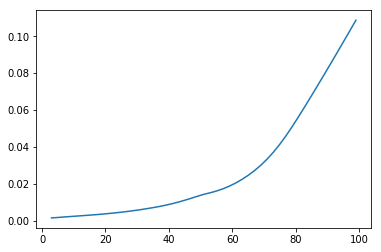

Starting size = 115


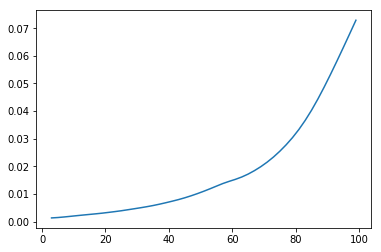

Starting size = 133


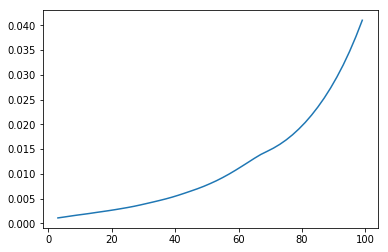

Starting size = 153


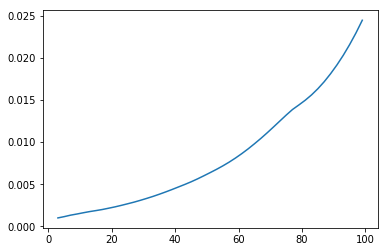

Starting size = 175


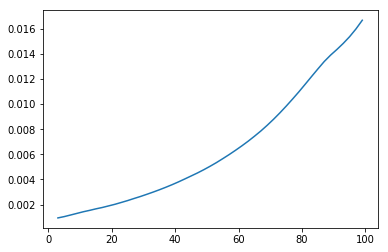

Starting size = 203


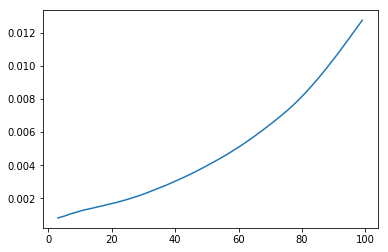

Starting size = 233


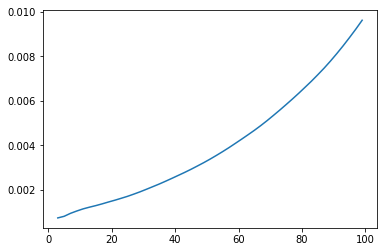

Starting size = 269


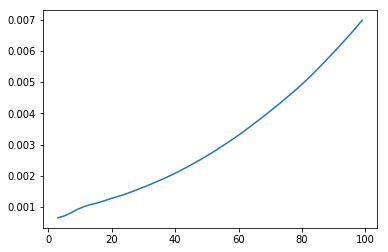

Starting size = 309


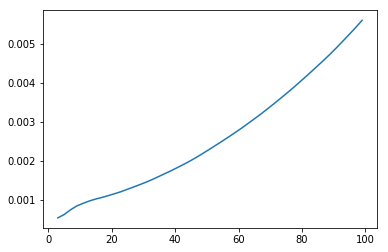

Starting size = 355


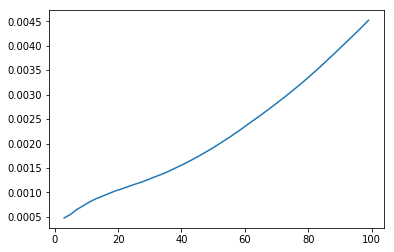

Starting size = 409


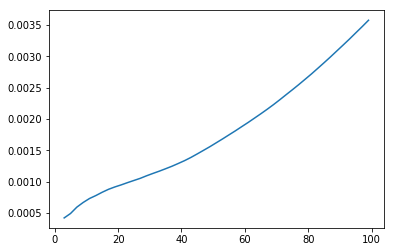

Starting size = 471


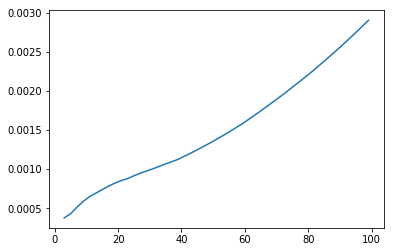

Starting size = 543


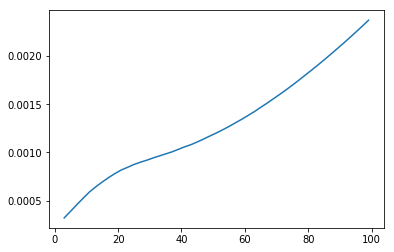

Starting size = 625


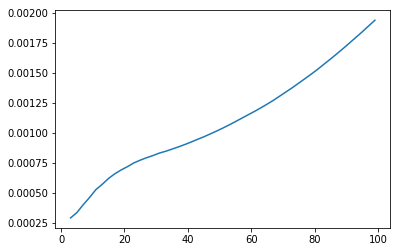

Starting size = 719


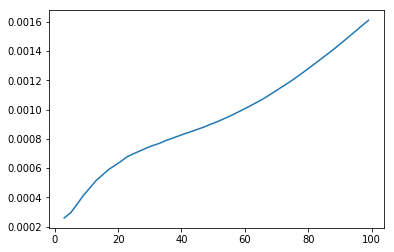

Starting size = 829


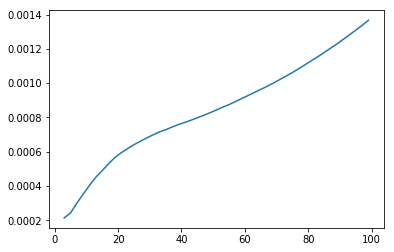

Starting size = 955


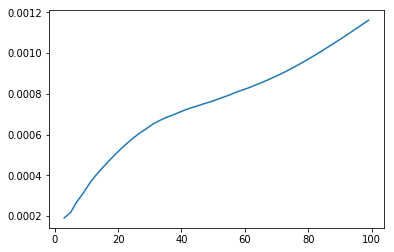

Starting size = 1099


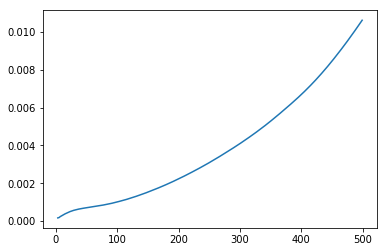

Starting size = 1265


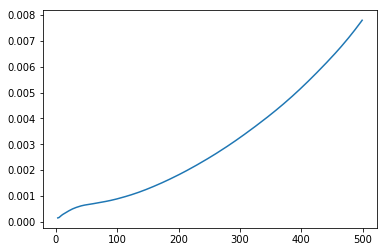

Starting size = 1457


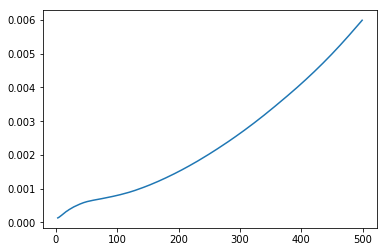

Starting size = 1677


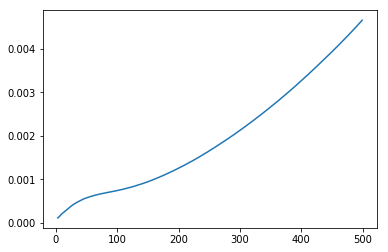

Starting size = 1931


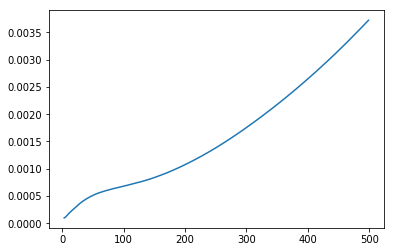

Starting size = 2223


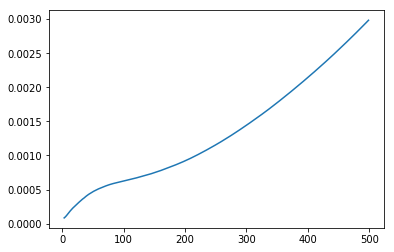

Starting size = 2559


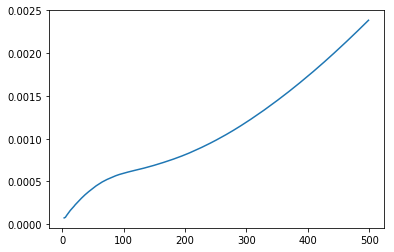

Starting size = 2947


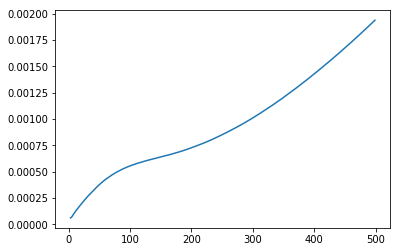

Starting size = 3393


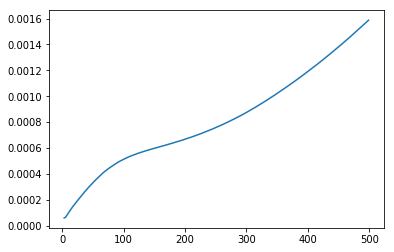

Starting size = 3907


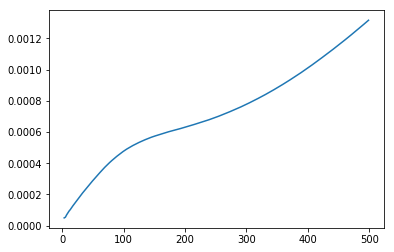

Starting size = 4499


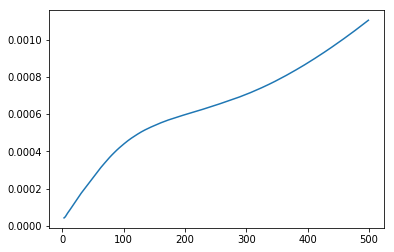

Starting size = 5179


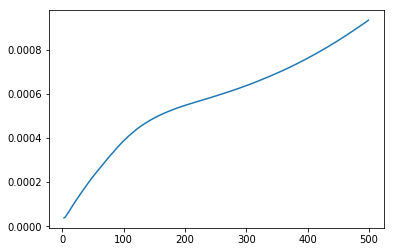

Starting size = 5963


MemoryError: 

In [2]:
f = h5py.File('Data_Fourier.h5','r')
name_minous="Fourier_minous"
name_plus="Fourier_plus"
for number in [i if i%2!=0 else i+1 for i in np.logspace(2,5,dtype=np.int,num=50)]:
    print("Starting size = {}".format(number))
    F_minous=f[name_minous+"_"+str(number)].value
    F_plus=f[name_plus+"_"+str(number)].value
    total=[]
    if number < 1000:
        rango = range(3,101,2)
    else:
        rango = range(3,501,5)
    for L in rango:
        res=[]
        for i in range(F_minous.shape[0]):
            T_plus_H=Covariance_matrix_from_sub_sample(F_plus[i,:],F_minous[i,:],L)
            T=Toeplitz_matrix(F_plus[i,:],L)
            W_T_H=np.linalg.svd(T_plus_H,compute_uv=False)
            W_T=np.linalg.svd(T,compute_uv=False)
            result=np.sum(np.square((np.array(sorted(W_T_H))-np.array(sorted(W_T)))))/L
            res.append(result)
        total.append(np.mean(res))
    plt.plot(rango,total)
    plt.show()

Starting size = 5963


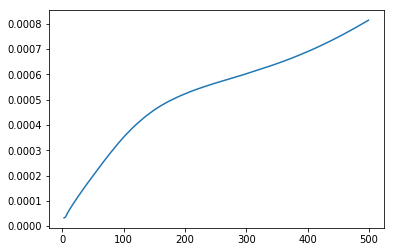

Starting size = 6867


In [ ]:
f = h5py.File('Data_Fourier.h5','r')
name_minous="Fourier_minous"
name_plus="Fourier_plus"

for number in [i if i%2!=0 else i+1 for i in np.logspace(2,5,dtype=np.int,num=50)][29:]:
    print("Starting size = {}".format(number))
    F_minous=f[name_minous+"_"+str(number)].value
    F_plus=f[name_plus+"_"+str(number)].value
    total=[]
    if number < 1000:
        rango = range(3,101,2)
    else:
        rango = range(3,501,2)
    for L in rango:
        res=[]
        for i in range(F_minous.shape[0]):
            T_plus_H=Covariance_matrix_from_sub_sample(F_plus[i,:],F_minous[i,:],L)
            T=Toeplitz_matrix(F_plus[i,:],L)
            W_T_H=np.linalg.svd(T_plus_H,compute_uv=False)
            W_T=np.linalg.svd(T,compute_uv=False)
            result=np.sum(np.square((np.array(sorted(W_T_H))-np.array(sorted(W_T)))))/L
            res.append(result)
        total.append(np.mean(res))
    plt.plot(rango,total)
    plt.show()

In [2]:
f = h5py.File('Data_Fourier.h5','r')
name_minous="Fourier_minous"
name_plus="Fourier_plus"

for number in [i if i%2!=0 else i+1 for i in np.logspace(2,5,dtype=np.int,num=50)][20:40]:
    print("Starting size = {}".format(number))
    F_minous=f[name_minous+"_"+str(number)].value
    F_plus=f[name_plus+"_"+str(number)].value
    total=[]
    if number < 1000:
        rango = range(3,101,2)
    else:
        rango = range(3,501,5)
    for L in tqdm(rango):
        res=[]
        for i in range(F_minous.shape[0]):
            #print(f"Cantidad fourier = {i}",end="\r")
            T_plus_H=Covariance_matrix_from_sub_sample(F_plus[i,:],F_minous[i,:],L)
            T=Toeplitz_matrix(F_plus[i,:],L)
            W_T_H=np.linalg.svd(T_plus_H,compute_uv=False)
            W_T=np.linalg.svd(T,compute_uv=False)
            result=np.sum(np.square((np.array(sorted(W_T_H))-np.array(sorted(W_T)))))/L
            res.append(result)
        total.append(np.mean(res))
        #print(f"Done L= {i}",end="\r")
    np.savetxt(f"Data_{number}.txt",total,delimiter="\t")

Starting size = 1677



Starting size = 1931



Starting size = 2223



Starting size = 2559



Starting size = 2947



Starting size = 3393



Starting size = 3907



Starting size = 4499



Starting size = 5179



Starting size = 5963



Starting size = 6867



Starting size = 7907



Starting size = 9103



Starting size = 10481



Starting size = 12067



Starting size = 13895



Starting size = 15999



Starting size = 18421



Starting size = 21209



Starting size = 24421
